In [1]:
#list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf

#from keras.utils.np_utils import to_categorical#convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam
from sklearn.model_selection import train_test_split  

In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
data=r'C:\Users\Sknja M\tomato'

In [4]:
Images=[]
import os
for dirname,_,filenames in os.walk(data):
    for filename in filenames:
        img=os.path.join(dirname,filename)
        Images.append(img)

In [5]:
Images[:10]

['C:\\Users\\Sknja M\\tomato\\Tomato___Bacterial_spot\\00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG',
 'C:\\Users\\Sknja M\\tomato\\Tomato___Bacterial_spot\\0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG',
 'C:\\Users\\Sknja M\\tomato\\Tomato___Bacterial_spot\\00639d29-2d1a-4fcf-9bd3-a2b3109c74c4___UF.GRC_BS_Lab Leaf 1054.JPG',
 'C:\\Users\\Sknja M\\tomato\\Tomato___Bacterial_spot\\00728f4d-83a0-49f1-87f8-374646fcda05___GCREC_Bact.Sp 6326.JPG',
 'C:\\Users\\Sknja M\\tomato\\Tomato___Bacterial_spot\\00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG',
 'C:\\Users\\Sknja M\\tomato\\Tomato___Bacterial_spot\\00b7e89a-e129-4576-b51f-48923888bff9___GCREC_Bact.Sp 6202.JPG',
 'C:\\Users\\Sknja M\\tomato\\Tomato___Bacterial_spot\\01375198-62af-4c40-bddf-f3c11107200b___GCREC_Bact.Sp 5914.JPG',
 'C:\\Users\\Sknja M\\tomato\\Tomato___Bacterial_spot\\01a3cf3f-94c1-44d5-8972-8c509d62558e___GCREC_Bact.Sp 3396.JPG',
 'C:\\Users\\Sknja M\\tomato\\Tomato___Bact

In [6]:
len(Images)

18345

In [7]:
class_label=[]
for i in Images:
    j=i.split('\\')
    class_label.append(j[-2])

In [8]:
class_label[:10]

['Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot']

In [9]:
#shuffle two lists with same order
temp=list(zip(Images,class_label))
random.shuffle(temp)
Images,class_label=zip(*temp)
data=pd.DataFrame(list(zip(Images,class_label)),columns=['image_path','class_label'])

In [10]:
data.shape

(18345, 2)

In [11]:
data.head()

image_path  \
0  C:\Users\Sknja M\tomato\Tomato___healthy\f2758...   
1  C:\Users\Sknja M\tomato\Tomato___Leaf_Mold\361...   
2  C:\Users\Sknja M\tomato\Tomato___Spider_mites ...   
3  C:\Users\Sknja M\tomato\Tomato___Early_blight\...   
4  C:\Users\Sknja M\tomato\Tomato___Leaf_Mold\be2...   

                                     class_label  
0                               Tomato___healthy  
1                             Tomato___Leaf_Mold  
2  Tomato___Spider_mites Two-spotted_spider_mite  
3                          Tomato___Early_blight  
4                             Tomato___Leaf_Mold

In [12]:
data['class_label'].value_counts()

class_label
Tomato___Tomato_Yellow_Leaf_Curl_Virus           1961
Tomato___healthy                                 1926
Tomato___Early_blight                            1920
Tomato___Leaf_Mold                               1882
Tomato___Late_blight                             1851
Tomato___Target_Spot                             1827
Tomato___Tomato_mosaic_virus                     1790
Tomato___Septoria_leaf_spot                      1745
Tomato___Spider_mites Two-spotted_spider_mite    1741
Tomato___Bacterial_spot                          1702
Name: count, dtype: int64

Text(0.5, 0, 'Class_label')

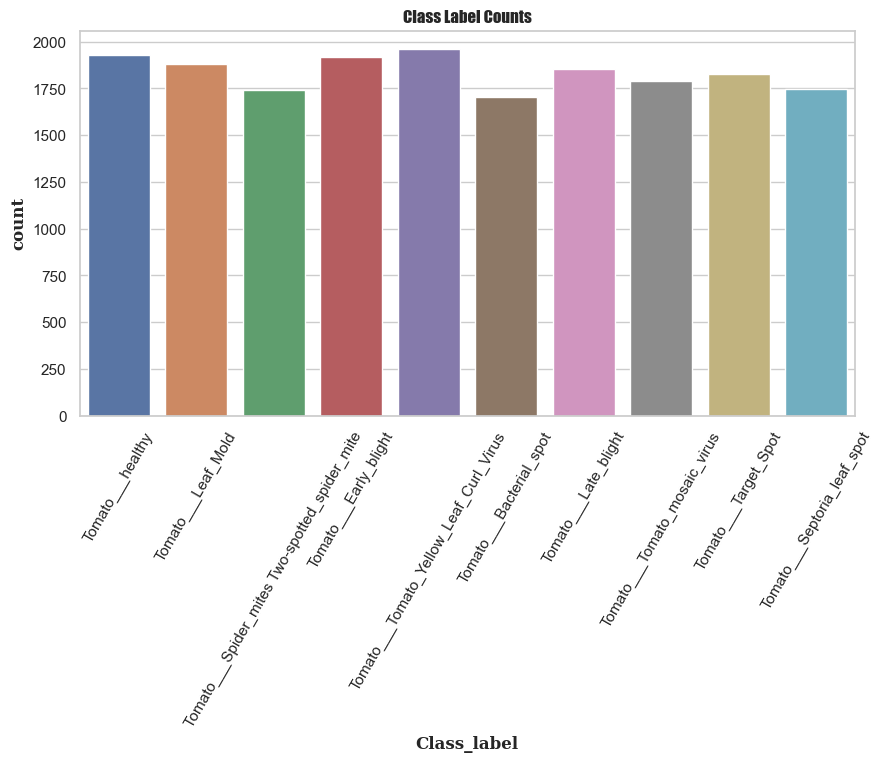

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class_label", data=data, palette=sns.color_palette())
plt.xticks(rotation=60)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [14]:
class_labels = data['class_label'].unique()
print(class_labels)


['Tomato___healthy' 'Tomato___Leaf_Mold'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Early_blight'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Bacterial_spot'
 'Tomato___Late_blight' 'Tomato___Tomato_mosaic_virus'
 'Tomato___Target_Spot' 'Tomato___Septoria_leaf_spot']


In [15]:
class_labels

array(['Tomato___healthy', 'Tomato___Leaf_Mold',
       'Tomato___Spider_mites Two-spotted_spider_mite',
       'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Bacterial_spot', 'Tomato___Late_blight',
       'Tomato___Tomato_mosaic_virus', 'Tomato___Target_Spot',
       'Tomato___Septoria_leaf_spot'], dtype=object)

In [16]:
from sklearn.utils import resample

# Dictionary to store resampled dataframes
resampled_data = {}

# Iterate over each class label
for label in class_labels:
    print(label)
    # Filter data for the current class label
    df = data[data['class_label'] == label]
    
    # Resample the dataframe
    resampled_df = resample(df, replace=True, n_samples=300, random_state=42)
    
    # Store the resampled dataframe in the dictionary
    resampled_data[label] = resampled_df


Tomato___healthy
Tomato___Leaf_Mold
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Early_blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Bacterial_spot
Tomato___Late_blight
Tomato___Tomato_mosaic_virus
Tomato___Target_Spot
Tomato___Septoria_leaf_spot


In [17]:
type(resampled_data)

dict

In [18]:
import pandas as pd

# Convert dictionary values (dataframes) to a list
resampled_df_list = list(resampled_data.values())

# Concatenate the list of dataframes into a single dataframe
combined_resampled_df = pd.concat(resampled_df_list)

# Reset index of the combined dataframe
combined_resampled_df.reset_index(drop=True, inplace=True)

# Display the combined dataframe
print(combined_resampled_df)


                                             image_path  \
0     C:\Users\Sknja M\tomato\Tomato___healthy\1b966...   
1     C:\Users\Sknja M\tomato\Tomato___healthy\06040...   
2     C:\Users\Sknja M\tomato\Tomato___healthy\2ee6d...   
3     C:\Users\Sknja M\tomato\Tomato___healthy\6949b...   
4     C:\Users\Sknja M\tomato\Tomato___healthy\0eb4b...   
...                                                 ...   
2995  C:\Users\Sknja M\tomato\Tomato___Septoria_leaf...   
2996  C:\Users\Sknja M\tomato\Tomato___Septoria_leaf...   
2997  C:\Users\Sknja M\tomato\Tomato___Septoria_leaf...   
2998  C:\Users\Sknja M\tomato\Tomato___Septoria_leaf...   
2999  C:\Users\Sknja M\tomato\Tomato___Septoria_leaf...   

                      class_label  
0                Tomato___healthy  
1                Tomato___healthy  
2                Tomato___healthy  
3                Tomato___healthy  
4                Tomato___healthy  
...                           ...  
2995  Tomato___Septoria_leaf_spot  
299

In [19]:
combined_resampled_df["class_label"].value_counts()

class_label
Tomato___healthy                                 300
Tomato___Leaf_Mold                               300
Tomato___Spider_mites Two-spotted_spider_mite    300
Tomato___Early_blight                            300
Tomato___Tomato_Yellow_Leaf_Curl_Virus           300
Tomato___Bacterial_spot                          300
Tomato___Late_blight                             300
Tomato___Tomato_mosaic_virus                     300
Tomato___Target_Spot                             300
Tomato___Septoria_leaf_spot                      300
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode labels numerically
label_encoder = LabelEncoder()
combined_resampled_df['y_encoded'] = label_encoder.fit_transform(combined_resampled_df['class_label'])

In [21]:
def resize_image(img_path):
    # Read the image
    file = cv2.imread(img_path)
    
    # Resize the image
    resized = cv2.resize(file, (128, 128), interpolation=cv2.INTER_AREA)
    resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
    resized = resized / 255
    resized= np.array(resized)
    # Reshape the resized image
    return resized

In [22]:
combined_resampled_df['y_encoded']

0       9
1       9
2       9
3       9
4       9
       ..
2995    4
2996    4
2997    4
2998    4
2999    4
Name: y_encoded, Length: 3000, dtype: int32

In [23]:
# import cv2
# images=[resize_image(img) for img in combined_resampled_df['image_path']]

In [24]:
images = []
for i in combined_resampled_df['image_path']:
    file_name, file_extension = os.path.splitext(i)
    if file_extension == '.db':
        print(file_name)
    else:
        app = resize_image(i)
        images.append(app)

In [25]:
combined_resampled_df['class_label'][:15]

0     Tomato___healthy
1     Tomato___healthy
2     Tomato___healthy
3     Tomato___healthy
4     Tomato___healthy
5     Tomato___healthy
6     Tomato___healthy
7     Tomato___healthy
8     Tomato___healthy
9     Tomato___healthy
10    Tomato___healthy
11    Tomato___healthy
12    Tomato___healthy
13    Tomato___healthy
14    Tomato___healthy
Name: class_label, dtype: object

In [26]:
class_names = list(combined_resampled_df['class_label'])

In [27]:
images[0].shape

(128, 128, 3)

In [28]:
len(images)

3000

In [29]:
len(class_names)

3000

In [30]:
#images.shape
images=np.array(images)
images.shape

(3000, 128, 128, 3)

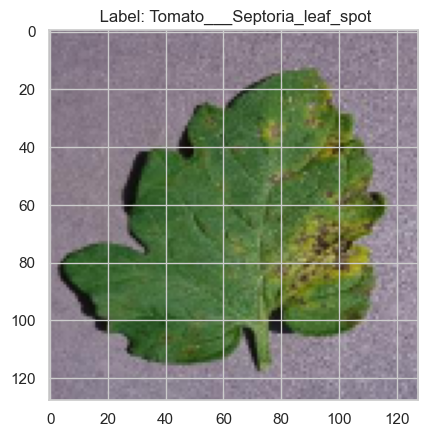

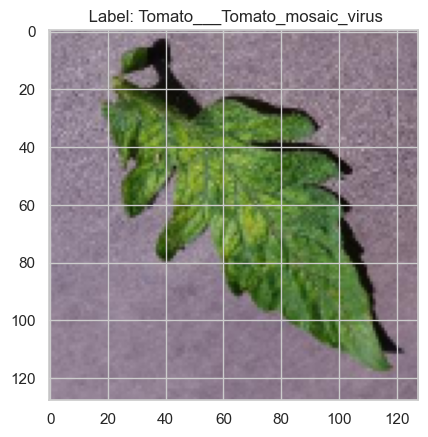

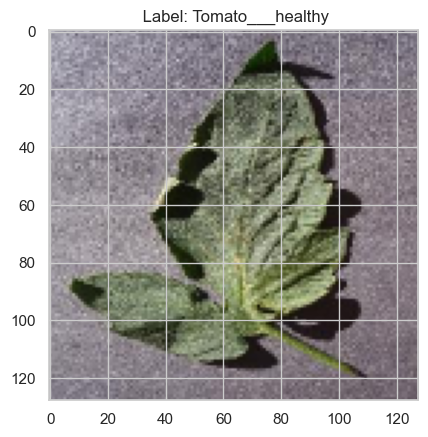

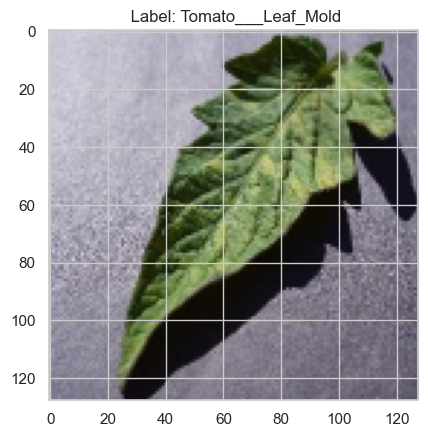

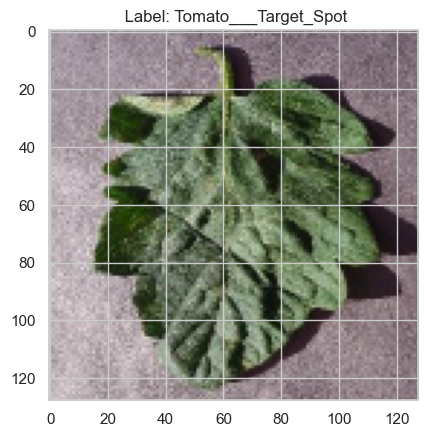

In [31]:
# Randomly choose 5 indices
random_indices = random.sample(range(len(images)), 5)

# Display 5 randomly chosen images with labels
for idx in random_indices:
    resized_img = images[idx]

    label = combined_resampled_df['class_label'][idx]  # Assuming label is stored in the 'label' column of your dataset
    plt.imshow(resized_img)
    plt.title(f" Label: {label}")
    #plt.axis('off')
    plt.show()

In [32]:
combined_resampled_df['class_label']

0                  Tomato___healthy
1                  Tomato___healthy
2                  Tomato___healthy
3                  Tomato___healthy
4                  Tomato___healthy
                   ...             
2995    Tomato___Septoria_leaf_spot
2996    Tomato___Septoria_leaf_spot
2997    Tomato___Septoria_leaf_spot
2998    Tomato___Septoria_leaf_spot
2999    Tomato___Septoria_leaf_spot
Name: class_label, Length: 3000, dtype: object

In [33]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(combined_resampled_df['class_label'])

In [34]:
enc.classes_

array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Leaf_Mold',
       'Tomato___Septoria_leaf_spot',
       'Tomato___Spider_mites Two-spotted_spider_mite',
       'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U45')

In [35]:
y[:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2,stratify = y,random_state=2)

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2400, 128, 128, 3), (2400, 10), (600, 128, 128, 3), (600, 10))

# CNN

In [38]:
# Set the CNN model 
input_shape = (128, 128, 3)

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape=input_shape))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

C:\Users\Sknja M\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 340,522 (1.30 MB)

 Trainable params: 340,522 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#compile the model
opt=Adam(learning_rate=0.001)
optimizer=RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [40]:
#Fit the data or train the model
History= model.fit(X_train, y_train, epochs =40,validation_data = (X_test,y_test) ,batch_size =32)

Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.1064 - loss: 2.3693 - val_accuracy: 0.1000 - val_loss: 2.2944
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.1221 - loss: 2.2811 - val_accuracy: 0.1767 - val_loss: 2.2501
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.1649 - loss: 2.2202 - val_accuracy: 0.1800 - val_loss: 2.1418
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.1489 - loss: 2.1764 - val_accuracy: 0.2067 - val_loss: 2.1081
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.2336 - loss: 2.0838 - val_accuracy: 0.2933 - val_loss: 2.0126
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.2476 - loss: 2.0528 - val_accuracy: 0.2833 - val_loss: 2.0646
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.2765 - loss: 1.9660 - val_accuracy: 0.3183 - val_loss: 1.9088
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.2921 - loss: 1.9256 - val_accuracy: 0.3300 - v

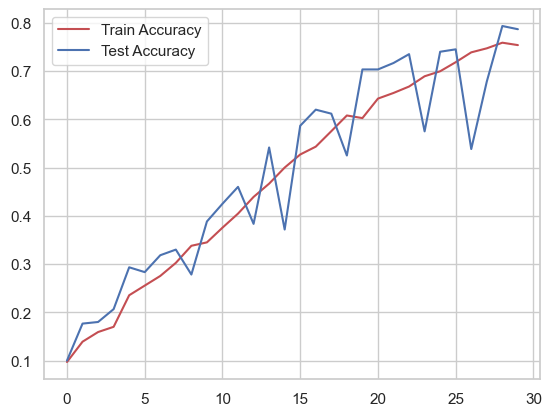

In [41]:
# plot the accuracy plot
plt.plot(History.history['accuracy'], 'r')
plt.plot(History.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

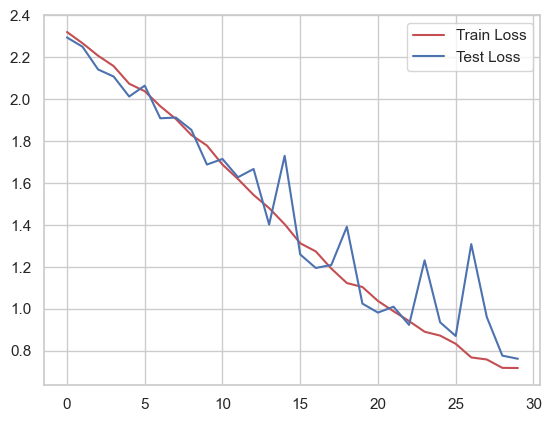

In [42]:
# plot the accuracy plot
plt.plot(History.history['loss'], 'r')
plt.plot(History.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [43]:
#print the test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7866666913032532


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 329ms/step


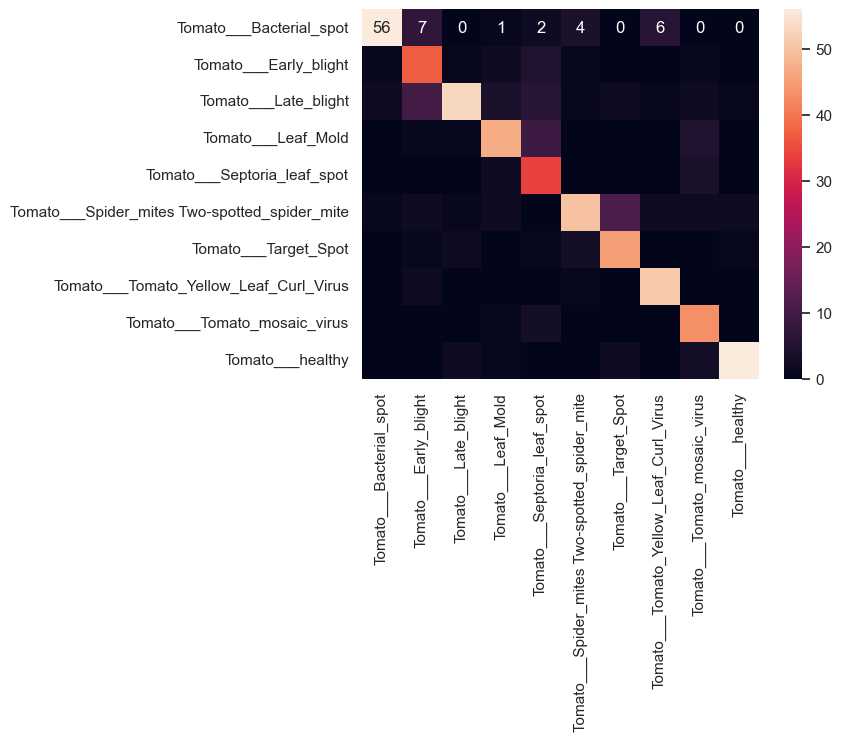

In [44]:
from sklearn.metrics import confusion_matrix
class_name = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax(model.predict(X_test), axis=1), np.argmax(y_test, axis=1)), columns = class_name, index=class_name)
heatmap = sns.heatmap(df_heatmap, annot = True, fmt = 'd')

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 318ms/step
Classification Report:
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.74      0.93      0.82        60
                        Tomato___Early_blight       0.77      0.62      0.69        60
                         Tomato___Late_blight       0.65      0.88      0.75        60
                           Tomato___Leaf_Mold       0.75      0.78      0.76        60
                  Tomato___Septoria_leaf_spot       0.85      0.57      0.68        60
Tomato___Spider_mites Two-spotted_spider_mite       0.68      0.83      0.75        60
                         Tomato___Target_Spot       0.85      0.75      0.80        60
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.94      0.85      0.89        60
                 Tomato___Tomato_mosaic_virus       0.91      0.72      0.80        60
                             Tomato___healthy       0.88      0.

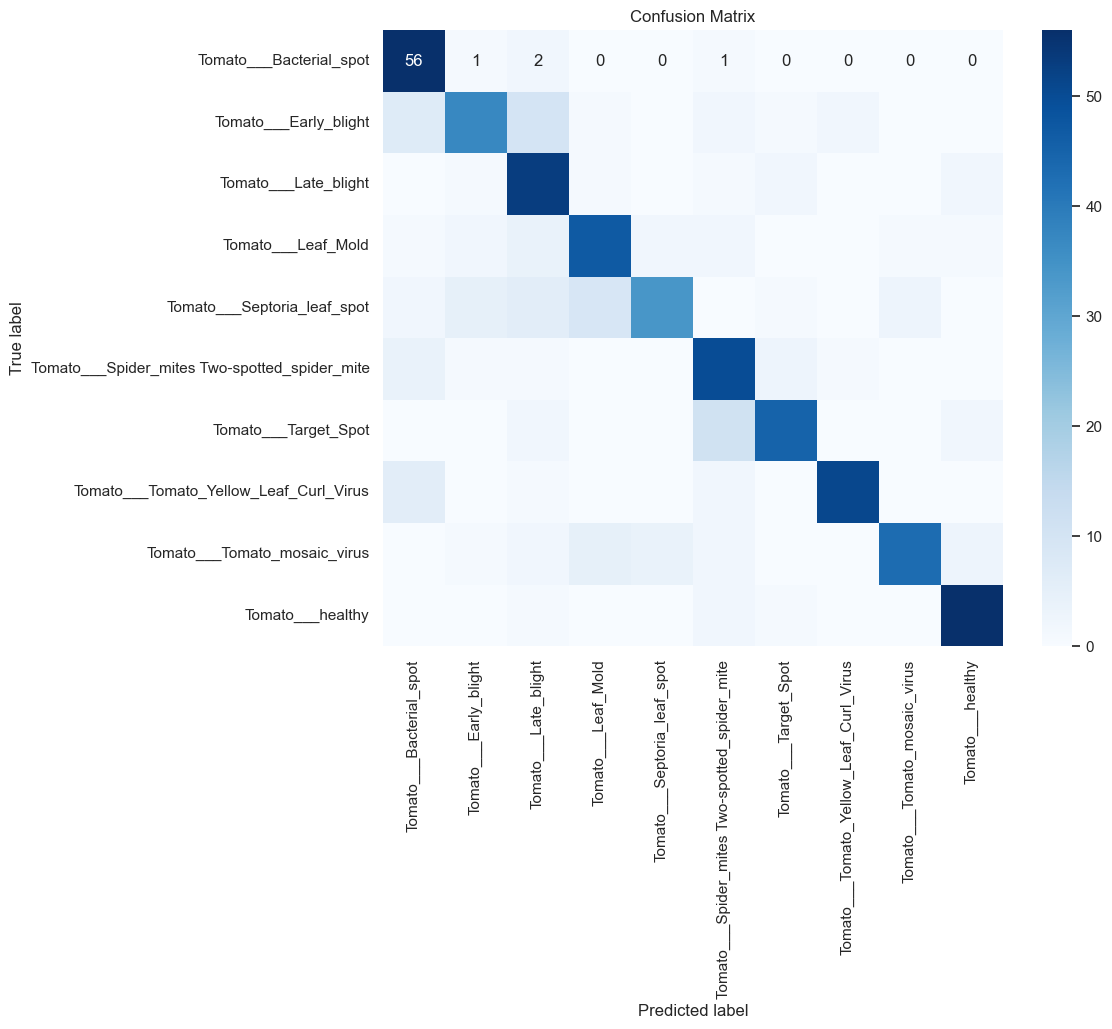

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already defined class_name, X_test, y_test, and model

# Compute predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
df_heatmap = pd.DataFrame(conf_matrix, columns=class_name, index=class_name)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt='d', cmap='Blues')
heatmap.set_xlabel('Predicted label')
heatmap.set_ylabel('True label')
heatmap.set_title('Confusion Matrix')

# Generate and print classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_name)
print("Classification Report:\n", report)

plt.show()


##  DenseNet121

In [46]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout,Activation,BatchNormalization,Lambda

In [47]:
den= DenseNet121(input_shape=(128,128,3),input_tensor=model_input,weights='imagenet',include_top=False)

In [48]:
den.trainable = True

set_trainable = False

for layer in den.layers:
    if layer.name == 'conv5_block16_0_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [49]:
for layer in den.layers[:]:
    if ('bn' in layer.name):
        trainable = False

In [50]:
x = Flatten()(den.output)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
prediction = Dense(10,activation='softmax')(x)

In [51]:
from tensorflow.keras.models import Model

In [52]:
from keras.models import Model
from keras.layers import Input

# Assuming 'prediction' is your output tensor
# Define your model
model = Model(model_input, outputs=prediction)

In [53]:
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 134, 134, 3)       │               0 │ input_layer_1[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 64, 64, 64)        │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 64, 64, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 64, 64, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 66, 66, 64)        │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 32, 32, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 32, 32, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 32, 32, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 32, 32, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 32, 32, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 32, 32, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 32, 32, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 9,136,074 (34.85 MB)

 Trainable params: 2,266,698 (8.65 MB)

 Non-trainable params: 6,869,376 (26.20 MB)

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 8, 8, 32)             36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 8, 8, 768)            0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 8, 8, 768)            3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 8, 8, 32)             36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 8, 8, 896)            0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 8, 8, 896)            3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 8, 8, 128)            0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 8, 8, 32)             36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 8, 8, 1024)           0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 pool4_bn (BatchNormalizati  (None, 8, 8, 1024)           4096      ['conv4_block24_concat[0][0]']
 on)      

 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 4, 4, 608)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block4_1_conv (Conv2  (None, 4, 4, 128)            77824     ['conv5_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block4_1_bn (BatchNo  (None, 4, 4, 128)            512       ['conv5_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv5_block8_0_bn (BatchNo  (None, 4, 4, 736)            2944      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 4, 4, 736)            0         ['conv5_block8_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block8_1_conv (Conv2  (None, 4, 4, 128)            94208     ['conv5_block8_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block8_1_bn (BatchNo  (None, 4, 4, 128)            512       ['conv5_block8_1_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 4, 4, 864)            3456      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block12_0_relu (Acti  (None, 4, 4, 864)            0         ['conv5_block12_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block12_1_conv (Conv  (None, 4, 4, 128)            110592    ['conv5_block12_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_blo

 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 4, 4, 992)            3968      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block16_0_relu (Acti  (None, 4, 4, 992)            0         ['conv5_block16_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block16_1_conv (Conv  (None, 4, 4, 128)            126976    ['conv5_block16_0_relu[0][0]']
 2D)                                                                                              
          

In [54]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define your callbacks
EarlyStop = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)
Checkpoint = ModelCheckpoint(monitor='val_accuracy', filepath='DR-model.keras', verbose=1, save_best_only=True, mode='auto')
callbacks = [EarlyStop, Checkpoint]

# Define your optimizer
adam = keras.optimizers.Adam(learning_rate=0.00001)

# Compile your model
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


In [55]:
his2= model.fit(X_train, y_train, epochs = 40,validation_data = (X_test,y_test), callbacks=callbacks ,batch_size =32,shuffle=True)

Epoch 1/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 778ms/step - accuracy: 0.1299 - loss: 3.2460
Epoch 1: val_accuracy improved from -inf to 0.25833, saving model to DR-model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.1302 - loss: 3.2413 - val_accuracy: 0.2583 - val_loss: 2.1249
Epoch 2/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.2458 - loss: 2.1974
Epoch 2: val_accuracy improved from 0.25833 to 0.42833, saving model to DR-model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 74s 989ms/step - accuracy: 0.2462 - loss: 2.1962 - val_accuracy: 0.4283 - val_loss: 1.7969
Epoch 3/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.3730 - loss: 1.8450
Epoch 3: val_accuracy improved from 0.42833 to 0.50333, saving model to DR-model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 75s 997ms/step - accuracy: 0.3732 - loss: 1.8444 - val_accuracy: 0.5033 - val_loss: 1.5787
Epoch 4/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 811ms/step - accuracy: 0.4637 - loss: 1.6155
Epoch 4: val_accuracy improved from 0.50333 to

In [56]:
Model_evaluation = model.evaluate(X_test, y_test)
print(f"%\nAccuracy: {Model_evaluation[1]*100:.2f} %")

19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 739ms/step - accuracy: 0.8295 - loss: 0.5026
%
Accuracy: 83.33 %


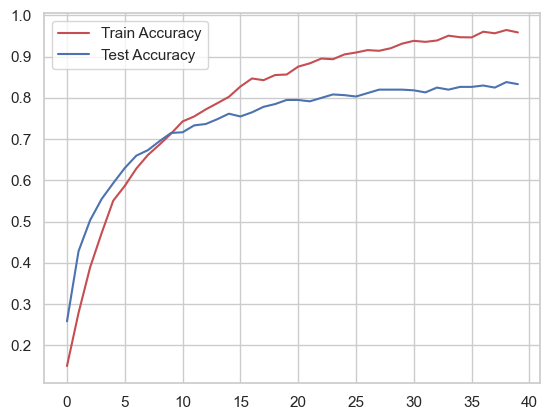

In [57]:
# plot the accuracy plot
plt.plot(his2.history['accuracy'], 'r')
plt.plot(his2.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step 


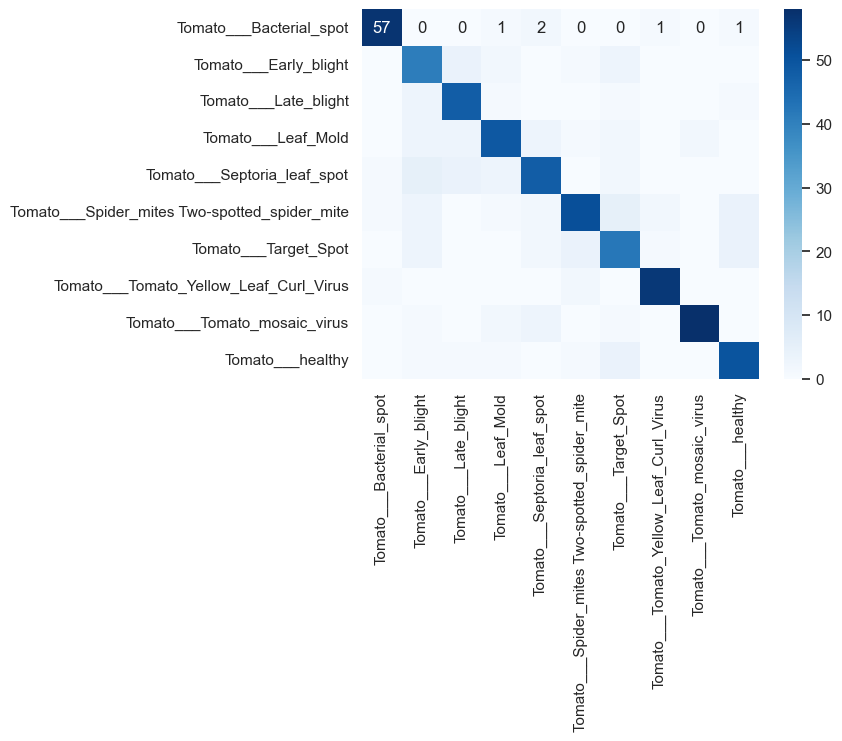

In [58]:
from sklearn.metrics import confusion_matrix
class_name = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax(model.predict(X_test), axis=1), np.argmax(y_test, axis=1)), columns = class_name, index=class_name)
heatmap = sns.heatmap(df_heatmap, annot = True, fmt = 'd',cmap='Blues')

19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 899ms/step
Classification Report:
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.92      0.95      0.93        60
                        Tomato___Early_blight       0.80      0.68      0.74        60
                         Tomato___Late_blight       0.89      0.80      0.84        60
                           Tomato___Leaf_Mold       0.78      0.82      0.80        60
                  Tomato___Septoria_leaf_spot       0.76      0.80      0.78        60
Tomato___Spider_mites Two-spotted_spider_mite       0.74      0.85      0.79        60
                         Tomato___Target_Spot       0.75      0.70      0.72        60
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.95      0.93      0.94        60
                 Tomato___Tomato_mosaic_virus       0.89      0.97      0.93        60
                             Tomato___healthy       0.86      0

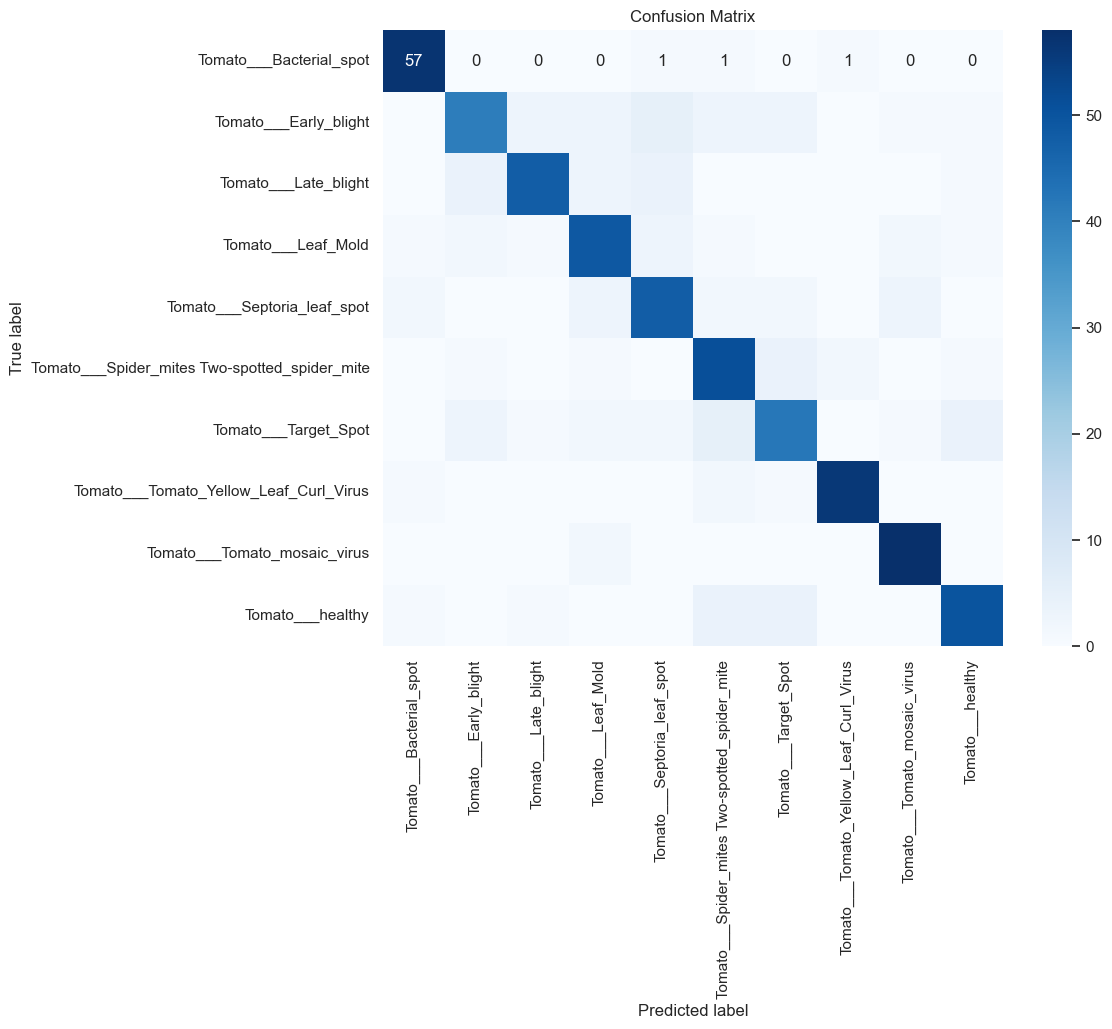

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined class_name, model, X_test, and y_test

# Compute predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
df_heatmap = pd.DataFrame(conf_matrix, columns=class_name, index=class_name)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt='d', cmap='Blues')
heatmap.set_xlabel('Predicted label')
heatmap.set_ylabel('True label')
heatmap.set_title('Confusion Matrix')

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_name)
print("Classification Report:\n", report)

plt.show()


In [60]:
results = pd.DataFrame(columns=['model', 'test_accuracy'])
new = ['Conv2D', (f"{score[1]*100:.2f} %")]
results.loc[1] = new

In [61]:
new = ['DenseNet121', (f"{Model_evaluation[1]*100:.2f} %")]
results.loc[2] = new

In [62]:
results

model test_accuracy
1       Conv2D       78.67 %
2  DenseNet121       83.33 %

MOBILENET

In [63]:
from tensorflow.keras.applications import MobileNet

In [64]:
mob = MobileNet(weights='imagenet', input_tensor=model_input, include_top=False,input_shape=(128,128,3))

In [65]:
mob.trainable=False

In [66]:
# Set the mobilenet model

model_mob=Sequential()
model_mob.add(mob)
model_mob.add(Flatten())
model_mob.add(Dense(128, activation='relu'))
model_mob.add(Dropout(0.2))
model_mob.add(Dense(64, activation='relu'))
model_mob.add(Dropout(0.2))
model_mob.add(Dense(10, activation='softmax'))

In [67]:

loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_mob.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])

In [68]:
#Fit the data or train the model
History_3 = model_mob.fit(X_train, y_train, epochs =20, validation_data = (X_test,y_test),batch_size = 32)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 34s 330ms/step - accuracy: 0.2810 - loss: 3.2024 - val_accuracy: 0.7267 - val_loss: 0.9861
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 297ms/step - accuracy: 0.6369 - loss: 1.1657 - val_accuracy: 0.8117 - val_loss: 0.7645
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 340ms/step - accuracy: 0.7516 - loss: 0.8617 - val_accuracy: 0.8233 - val_loss: 0.6604
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 316ms/step - accuracy: 0.8109 - loss: 0.6967 - val_accuracy: 0.8467 - val_loss: 0.6122
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 294ms/step - accuracy: 0.8781 - loss: 0.5571 - val_accuracy: 0.8633 - val_loss: 0.5792
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 323ms/step - accuracy: 0.9057 - loss: 0.4862 - val_accuracy: 0.8600 - val_loss: 0.5923
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 327ms/step - accuracy: 0.9166 - loss: 0.4856 - val_accuracy: 0.8767 - val_loss: 0.5704
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 295ms/step - accuracy: 0.9194 - loss: 0.4603 - val_accu

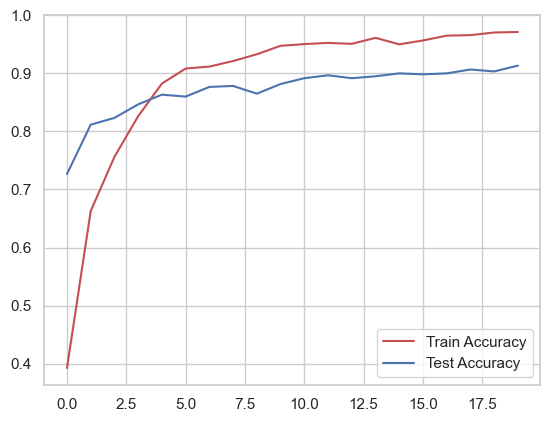

In [69]:
# plot the accuracy plot
plt.plot(History_3.history['accuracy'], 'r')
plt.plot(History_3.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

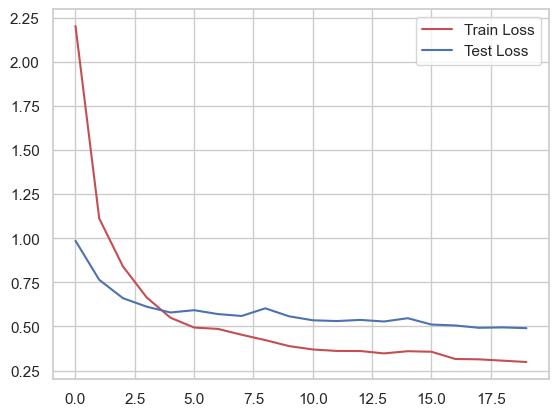

In [70]:
# plot the accuracy plot
plt.plot(History_3.history['loss'], 'r')
plt.plot(History_3.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [71]:
score_1 = model_mob.evaluate(X_test,y_test, verbose=0)
print('Test accuracy:', score_1[1])

Test accuracy: 0.9133333563804626


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step


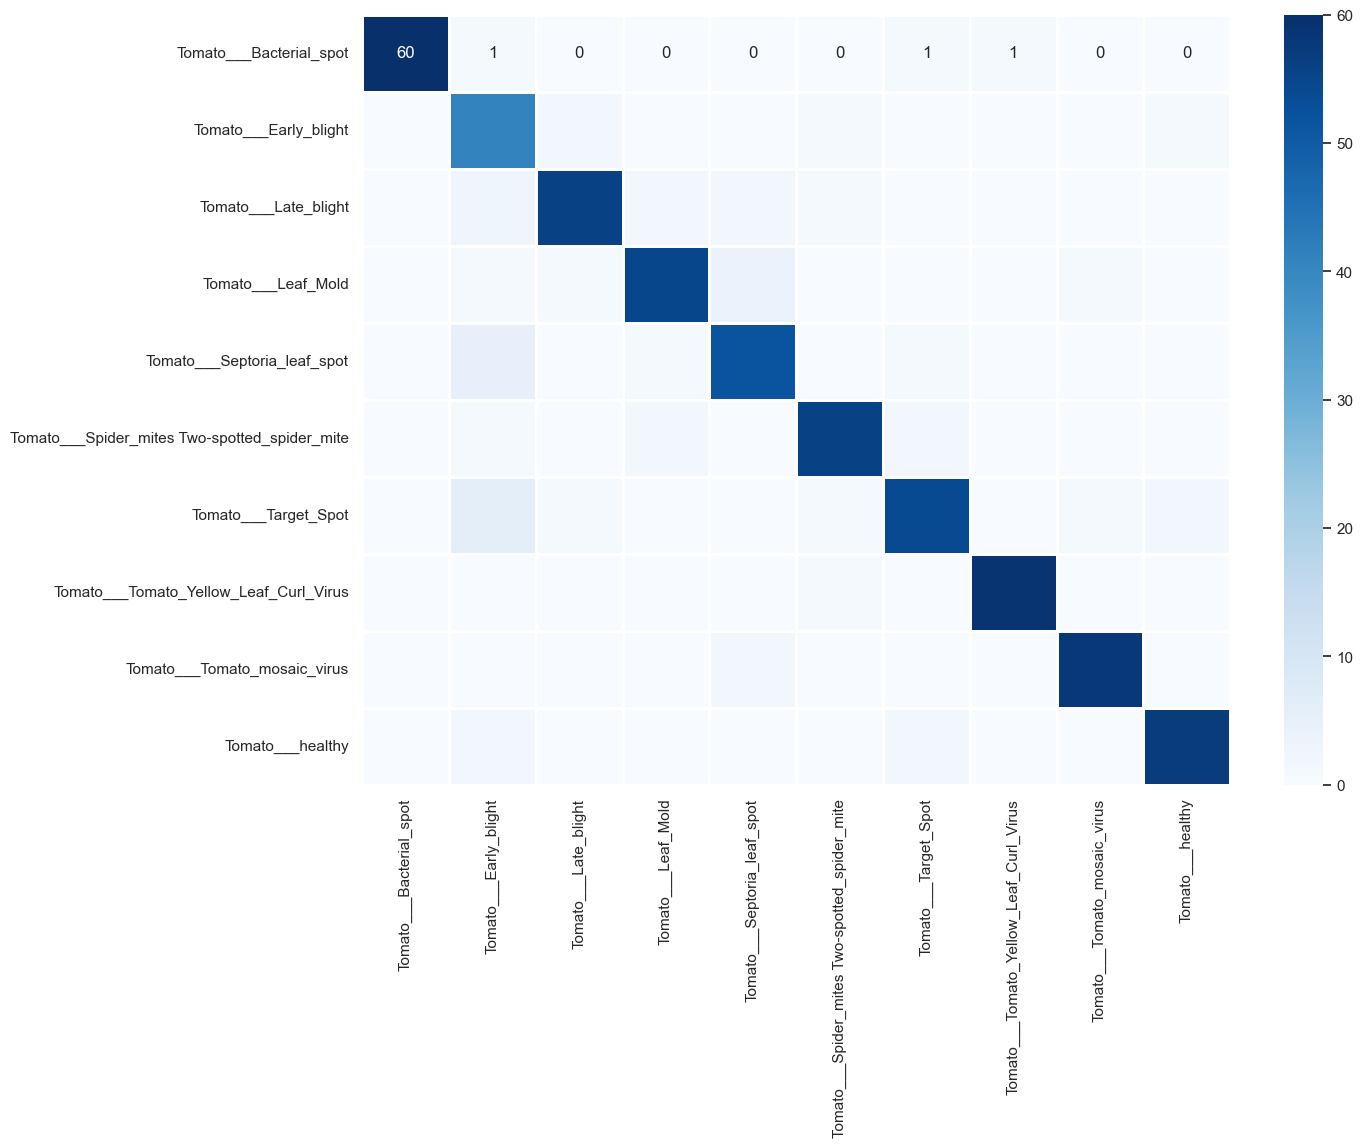

In [72]:
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_mob.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
plt.figure(figsize=(14,10))
heatmap = sns.heatmap(df_heatmap, annot=True, cmap='Blues',fmt="d",linewidths=2)

In [73]:
from tensorflow.keras.models import load_model

#Assuming 'model' is your trained deep learning model
model_mob.save(r"model_mob_93.keras")


## Import the Model Architecture (InceptionV3)

In [74]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(input_shape=(128,128,3), input_tensor=model_input, weights='imagenet', include_top=False)
base_model.trainable = True

# Add your custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)  # Add a fully connected layer
prediction1 = Dense(10,activation='softmax')(x) # Add a classification layer

# Combine the base model with your custom layers
inpv3 = Model(model_input, outputs=prediction1)


# Print model summary
inpv3.summary()


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 63, 63, 32)        │             864 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 63, 63, 32)        │              96 │ conv2d_6[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 63, 63, 32)        │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 61, 61, 32)        │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 61, 61, 32)        │              96 │ conv2d_7[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 61, 61, 32)        │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 61, 61, 64)        │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 61, 61, 64)        │             192 │ conv2d_8[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 61, 61, 64)        │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 30, 30, 64)        │               0 │ activation_2[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 30, 30, 80)        │           5,120 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 30, 30, 80)        │             240 │ conv2d_9[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 30, 30, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_10 (Conv2D)            │ (None, 28, 28, 192)       │         138,24

 Total params: 22,066,346 (84.18 MB)

 Trainable params: 22,031,914 (84.05 MB)

 Non-trainable params: 34,432 (134.50 KB)

                                                                                                  
 batch_normalization_156 (B  (None, 6, 6, 192)            576       ['conv2d_156[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_161 (B  (None, 6, 6, 192)            576       ['conv2d_161[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_156 (Activation  (None, 6, 6, 192)            0         ['batch_normalization_156[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_165 (Conv2D)         (None, 2, 2, 320)            552960    ['activation_164[0][0]']      
                                                                                                  
 conv2d_169 (Conv2D)         (None, 2, 2, 192)            331776    ['activation_168[0][0]']      
                                                                                                  
 batch_normalization_165 (B  (None, 2, 2, 320)            960       ['conv2d_165[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_169 (B  (None, 2, 2, 192)            576       ['conv2d_169[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_176 (Activation  (None, 2, 2, 384)            0         ['batch_normalization_176[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_177 (Activation  (None, 2, 2, 384)            0         ['batch_normalization_177[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_178 (B  (None, 2, 2, 192)            576       ['conv2d_178[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_182 (Activation  (None, 2, 2, 384)            0         ['batch_normalization_182[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_185 (Activation  (None, 2, 2, 384)            0         ['batch_normalization_185[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_186 (Activation  (None, 2, 2, 384)            0         ['batch_normalization_186[0][0
 )                                                                  ]']                           
          

In [75]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define your callbacks
EarlyStop = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)
Checkpoint = ModelCheckpoint(monitor='val_accuracy', filepath=r'inpv3-model.keras', verbose=1, save_best_only=True, mode='auto')
callbacks = [EarlyStop, Checkpoint]

# Define your optimizer
adam = keras.optimizers.Adam(learning_rate=0.001)

# Compile your model
inpv3.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [76]:
hi= inpv3.fit(X_train, y_train, epochs = 40,validation_data = (X_test,y_test), callbacks=callbacks ,batch_size =32,shuffle=True)

Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4426 - loss: 1.7346
Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to inpv3-model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.4444 - loss: 1.7291 - val_accuracy: 0.1000 - val_loss: 54.0580
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8015 - loss: 0.6850
Epoch 2: val_accuracy improved from 0.10000 to 0.28167, saving model to inpv3-model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8015 - loss: 0.6847 - val_accuracy: 0.2817 - val_loss: 9.5168
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8417 - loss: 0.5132
Epoch 3: val_accuracy improved from 0.28167 to 0.51333, saving model to inpv3-model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8419 - loss: 0.5126 - val_accuracy: 0.5133 - val_loss: 2.9253
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8927 - loss: 0.3510
Epoch 4: val_accuracy improved from 0.51333 to 0.516

In [77]:
Model_evaluation1 = inpv3.evaluate(X_test, y_test)
print(f"%\nAccuracy: {Model_evaluation1[1]*100:.2f} %")

19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 506ms/step - accuracy: 0.9310 - loss: 0.2899
%
Accuracy: 92.33 %


In [78]:
from tensorflow.keras.models import load_model

#Assuming 'model' is your trained deep learning model
inpv3.save(r"model_inpv_80.keras")

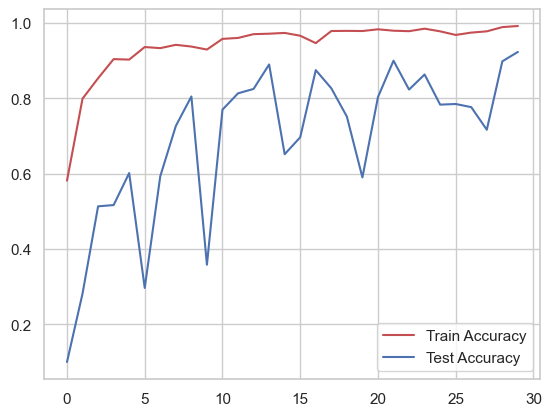

In [79]:
# plot the accuracy plot
plt.plot(hi.history['accuracy'], 'r')
plt.plot(hi.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 717ms/step


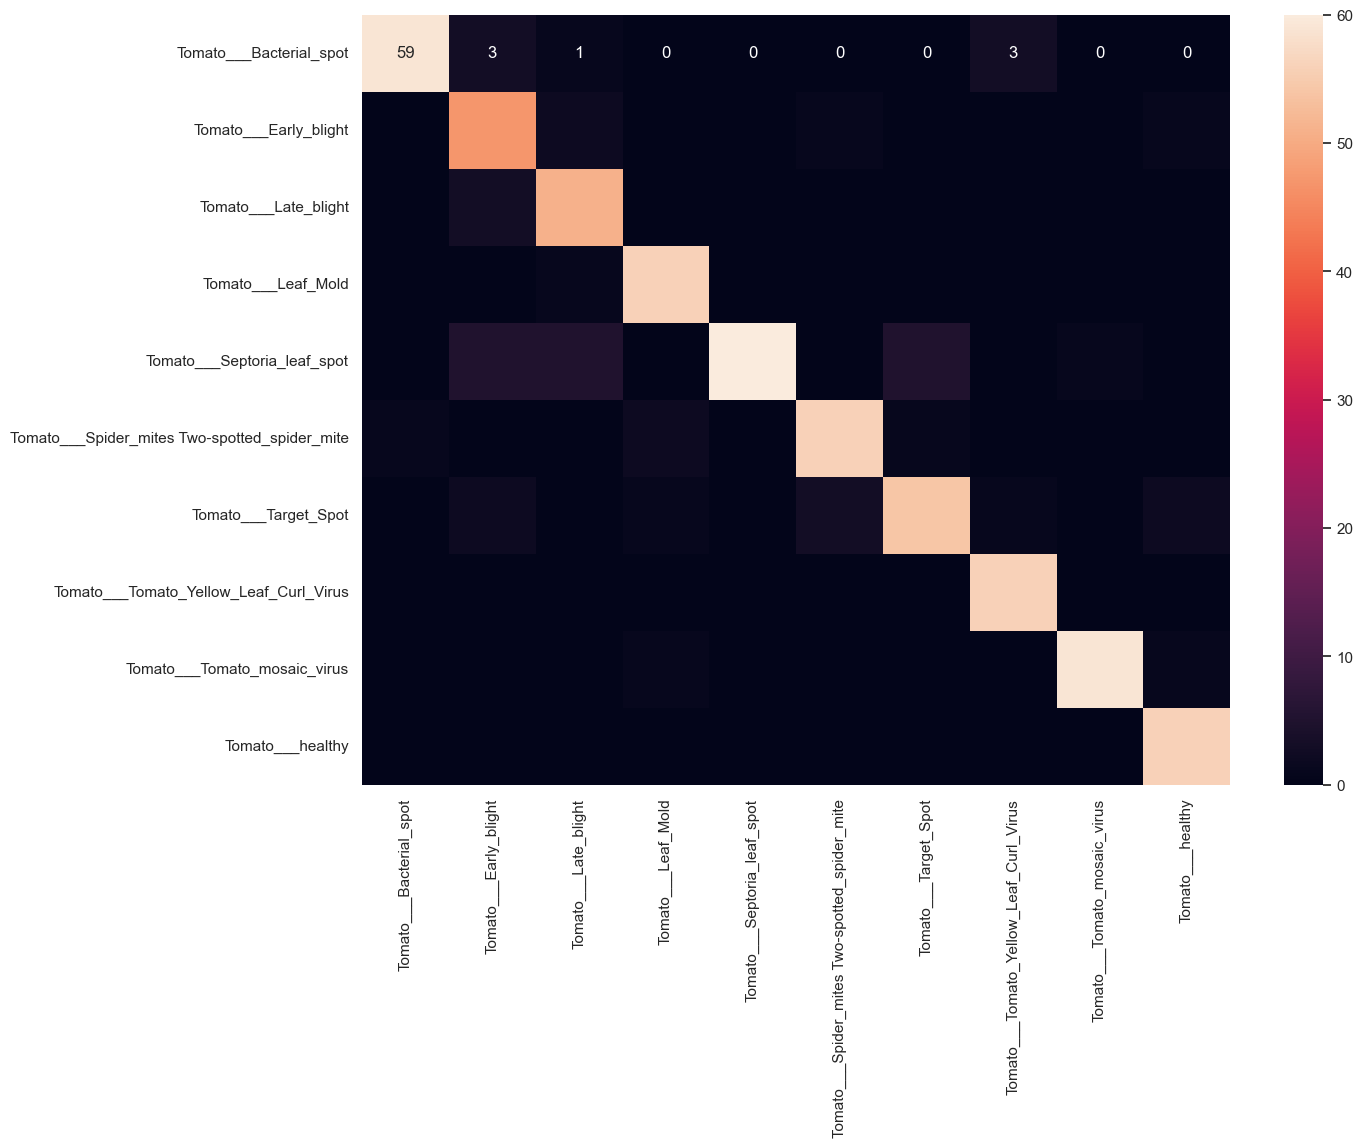

In [80]:
from sklearn.metrics import confusion_matrix
class_name = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax(inpv3.predict(X_test), axis=1), np.argmax(y_test, axis=1)), columns = class_name, index=class_name)
plt.figure(figsize=(14,10))
heatmap = sns.heatmap(df_heatmap, annot = True, fmt = 'd')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


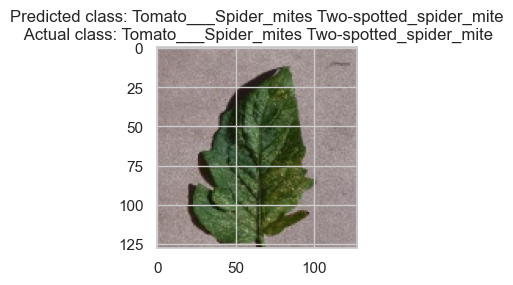

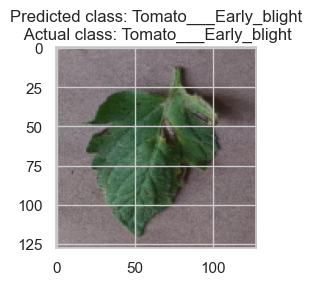

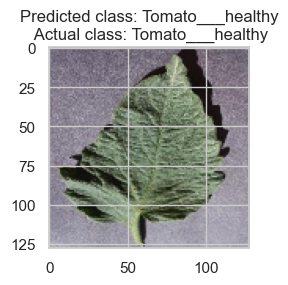

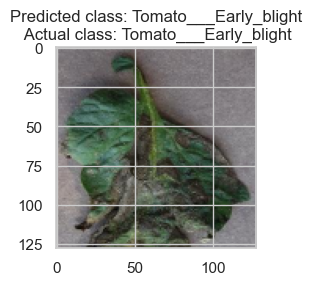

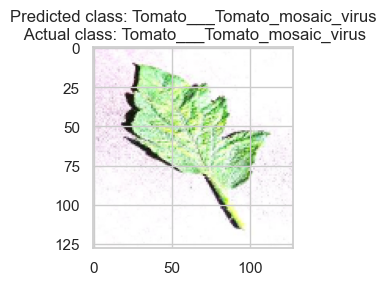

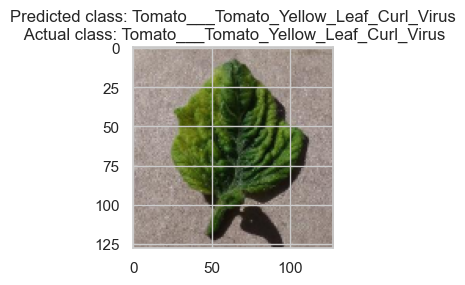

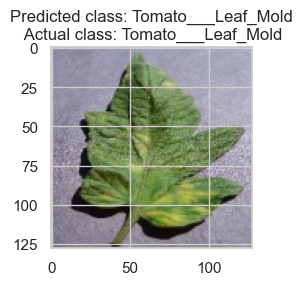

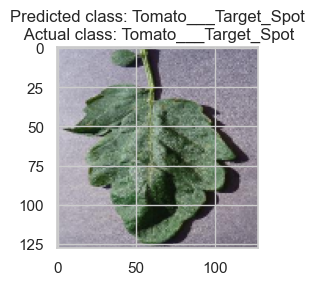

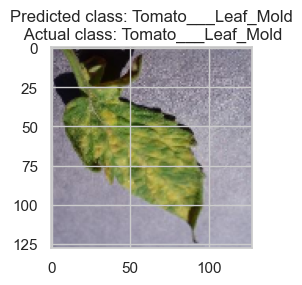

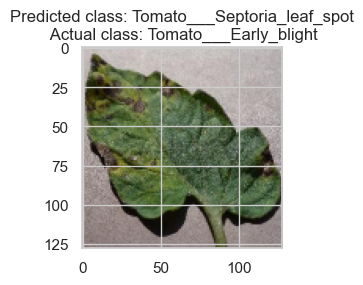

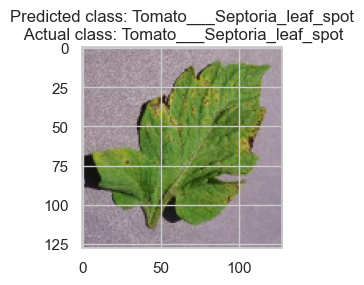

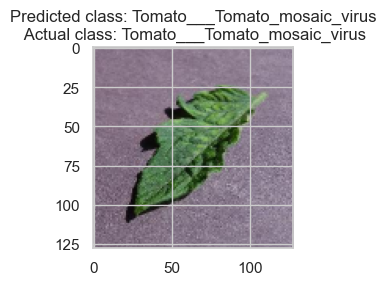

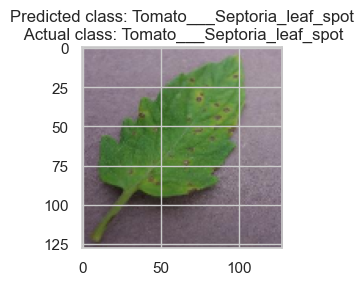

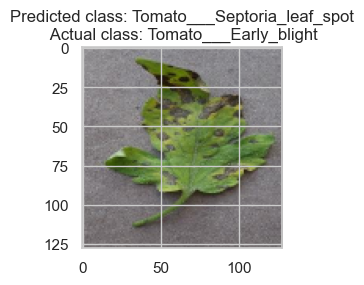

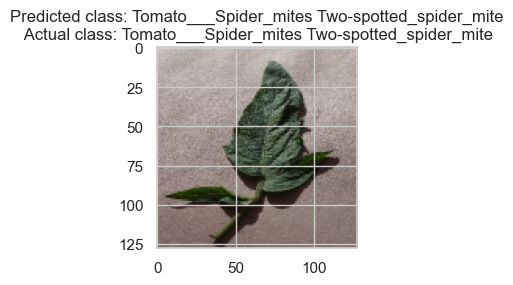

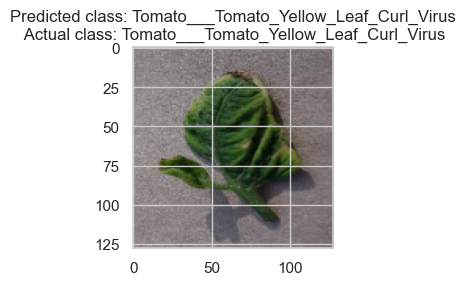

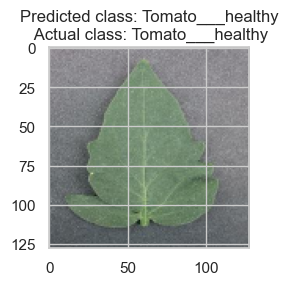

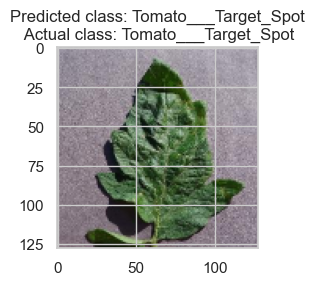

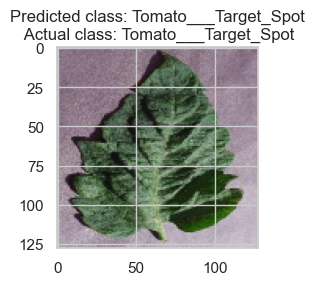

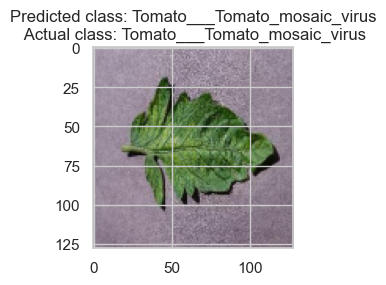

In [81]:
for i in range(20):
  plt.figure(figsize=(15,15))
  plt.subplot(4,5,i+1)
  pred = np.argmax(inpv3.predict(np.array([X_test[i]]))[0])
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  plt.imshow(X_test[i])

In [82]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have your model predictions and true labels
y_pred = inpv3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_true, y_pred_classes))


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 500ms/step
              precision    recall  f1-score   support

           0       0.89      0.98      0.94        60
           1       0.92      0.78      0.85        60
           2       0.94      0.85      0.89        60
           3       0.98      0.93      0.96        60
           4       0.79      1.00      0.88        60
           5       0.93      0.93      0.93        60
           6       0.86      0.90      0.88        60
           7       1.00      0.93      0.97        60
           8       0.97      0.98      0.98        60
           9       1.00      0.93      0.97        60

    accuracy                           0.92       600
   macro avg       0.93      0.92      0.92       600
weighted avg       0.93      0.92      0.92       600



In [83]:
results = pd.DataFrame(columns=['model', 'test_accuracy'])
new = ['Mobilenet', score_1[1]]
results.loc[1] = new

In [84]:
new = ['InceptionV3', Model_evaluation1[1]]
results.loc[2] = new

In [85]:
results

model  test_accuracy
1    Mobilenet       0.913333
2  InceptionV3       0.923333

Ensemble deep learning model

In [106]:
input_shape = X_train[0,:,:,:].shape
model_input = Input(shape=input_shape)

In [107]:
from keras import layers
from sklearn.model_selection import train_test_split
from keras import Model, Input

%matplotlib inline
import matplotlib.pyplot as plt

In [112]:
def ensemble(mods, model_input):
    op = [m.op[0] for m in mods]
    y = layers.Average()(op)
    m = Model(model_input, y, name='ensemble')
    return model

In [1]:
ensemble_model = ensemble([model, inpv3], model_input)

NameError: name 'ensemble' is not defined

In [ ]:
ensemble_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
Testing model accuracy

In [ ]:
loss_val, acc_val = ensemble_model.evaluate(X_val, y_val, verbose=1)

In [ ]:
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))

In [ ]:
loss_test, acc_test = ensemble_model.evaluate(X_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))